<a href="https://colab.research.google.com/github/stavG123/BI-Olympic-/blob/main/CarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚗 Car Sales**

### 📁 READ DATA




In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("anjaliprajapati307/usa-car-sales-dataset-2018-2024")

print("Path to dataset files:", path)

# Find the CSV file in the downloaded folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

# Read the dataset into a DataFrame
car_sales_df = pd.read_csv(csv_file)


Using Colab cache for faster access to the 'usa-car-sales-dataset-2018-2024' dataset.
Path to dataset files: /kaggle/input/usa-car-sales-dataset-2018-2024


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 🔍Data Analysis

In [ ]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000668 entries, 0 to 1000667
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Date               1000668 non-null  object 
 1   Salesperson        1000668 non-null  object 
 2   Customer Name      1000668 non-null  object 
 3   Customer Age       1000668 non-null  int64  
 4   Customer Gender    1000668 non-null  object 
 5   Car Make           1000668 non-null  object 
 6   Car Model          1000668 non-null  object 
 7   Car Year           1000668 non-null  int64  
 8   Quantity           1000668 non-null  int64  
 9   Sale Price         1000668 non-null  float64
 10  Cost               1000668 non-null  float64
 11  Profit             1000668 non-null  float64
 12  Discount           1000668 non-null  float64
 13  Payment Method     1000668 non-null  object 
 14  Commission Rate    1000668 non-null  float64
 15  Commission Earned  1000668 non-n

In [ ]:
unique_makes = sorted(car_sales_df['Car Make'].dropna().unique())
print("Number of unique car makes:", len(unique_makes))
print(unique_makes)

Number of unique car makes: 10
['Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mercedes', 'Nissan', 'Toyota']


In [ ]:
car_sales_df.duplicated().sum()


np.int64(0)

In [ ]:
# View the duplicate rows based on those columns
duplicates = car_sales_df[car_sales_df.duplicated(subset=['Date', 'Salesperson', 'Customer Name'], keep=False)]
# Show a sample of them
print(duplicates.head(10))

             Date        Salesperson       Customer Name  Customer Age  \
449    2023-09-26       Donald Allen    Cynthia Phillips            41   
2156   2020-07-21       Sharon Smith      Kelly Phillips            20   
15114  2024-10-10  Christopher Scott         David Smith            53   
17069  2019-10-26    Eileen Callahan         Brian Lewis            49   
27197  2018-02-23            Rose Le  Christopher Harris            55   
32704  2024-07-18      Matthew Gross          Sean Brown            27   
33506  2021-12-06       David Mullen    Jennifer Johnson            25   
35127  2018-02-23            Rose Le  Christopher Harris            33   
40207  2022-08-12        Brian Cline     Deborah Wallace            68   
49318  2020-08-07      Benjamin Beck         Chad Jacobs            26   

      Customer Gender   Car Make   Car Model  Car Year  Quantity  Sale Price  \
449              Male        Kia    Sportage      2018         2    40271.48   
2156           Female    

In [ ]:
# Find the duplicate groups based on Date, Salesperson, Customer Name
duplicate_mask = car_sales_df.duplicated(subset=['Date', 'Salesperson', 'Customer Name'], keep=False)

# Remove all those rows
car_sales_df_cleaned = car_sales_df[~duplicate_mask].copy()

# Verify
print(f"Original rows: {len(car_sales_df)}")
print(f"Rows after removing duplicate groups: {len(car_sales_df_cleaned)}")


Original rows: 1000668
Rows after removing duplicate groups: 1000526


In [ ]:
car_sales_df['Date'] = pd.to_datetime(car_sales_df['Date'], format='%Y-%m-%d', errors='coerce')
print(car_sales_df['Date'].dtype)

datetime64[ns]


In [ ]:
cols_to_drop = ['Sale Year', 'Sale Month', 'Sale Quarter', 'Day of Week']
car_sales_df = car_sales_df.drop(columns=[col for col in cols_to_drop if col in car_sales_df.columns])


In [ ]:
car_sales_df['Sale Year'] = car_sales_df['Date'].dt.year          # numeric
car_sales_df['Sale Month'] = car_sales_df['Date'].dt.month        # numeric 1-12
car_sales_df['Sale Quarter'] = car_sales_df['Date'].dt.quarter    # numeric 1-4
car_sales_df['Day of Week'] = car_sales_df['Date'].dt.day_name()  #

In [ ]:
day_map = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
car_sales_df['Day of Week Num'] = car_sales_df['Day of Week'].map(day_map)

season_map = {'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4}
car_sales_df['Season Num'] = car_sales_df['Season'].map(season_map)  # if Season still exists


In [ ]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000668 entries, 0 to 1000667
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Date               1000668 non-null  datetime64[ns]
 1   Salesperson        1000668 non-null  object        
 2   Customer Name      1000668 non-null  object        
 3   Customer Age       1000668 non-null  int64         
 4   Customer Gender    1000668 non-null  object        
 5   Car Make           1000668 non-null  object        
 6   Car Model          1000668 non-null  object        
 7   Car Year           1000668 non-null  int64         
 8   Quantity           1000668 non-null  int64         
 9   Sale Price         1000668 non-null  float64       
 10  Cost               1000668 non-null  float64       
 11  Profit             1000668 non-null  float64       
 12  Discount           1000668 non-null  float64       
 13  Payment Method     1000668 

In [ ]:
car_sales_df['Total Tag Price'] = car_sales_df['Sale Price'] / (1 - car_sales_df['Discount'])


In [ ]:
car_sales_df['Car Tag Price'] = car_sales_df['Total Tag Price'] / car_sales_df['Quantity']

In [ ]:
car_sales_df['Dealer Car Price'] = car_sales_df['Cost'] / car_sales_df['Quantity']

In [ ]:
# Step 1: Profit per car
car_sales_df['Profit_per_Car'] = car_sales_df['Profit'] / car_sales_df['Quantity']

# Step 2: Profit margin per car
car_sales_df['Profit_Margin_per_Car'] = car_sales_df['Profit_per_Car'] / car_sales_df['Dealer Car Price']


In [ ]:
car_sales_df.head(5)

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Sale Month,Sale Quarter,Day of Week,Day of Week Num,Season Num,Total Tag Price,Car Tag Price,Dealer Car Price,Profit_per_Car,Profit_Margin_per_Car
0,2019-04-02,Mary Simon,Kristin Blackwell,42,Male,Hyundai,Santa Fe,2019,1,25949.00,...,4,2,Tuesday,2,1,27314.736842,27314.736842,22137.55,3811.45,0.172171
1,2018-04-13,Nancy Mercado,Diana Black,65,Female,Ford,Explorer,2021,2,82236.84,...,4,2,Friday,5,1,83915.142857,41957.571429,31063.26,10055.16,0.323699
2,2021-01-31,Pamela King,Craig Powers,67,Female,Kia,Telluride,2023,2,60810.48,...,1,1,Sunday,7,4,61424.727273,30712.363636,34748.31,-4343.07,-0.124987
3,2020-09-30,Elizabeth Ashley,Jade Williams,69,Female,BMW,5 Series,2022,2,154746.56,...,9,3,Wednesday,3,3,161194.333333,80597.166667,57998.04,19375.24,0.334067
4,2020-07-03,Brian Cline,Nicholas Fernandez,50,Male,Audi,A6,2019,1,48629.00,...,7,3,Friday,5,2,51732.978723,51732.978723,38186.63,10442.37,0.273456


In [ ]:
# Calculate Car Age
car_sales_df['Car Age'] = car_sales_df['Sale Year'] - car_sales_df['Car Year']

# Verify
print(car_sales_df[['Car Year', 'Sale Year', 'Car Age']].head())


   Car Year  Sale Year  Car Age
0      2019       2019        0
1      2021       2018       -3
2      2023       2021       -2
3      2022       2020       -2
4      2019       2020        1


In [ ]:
# Remove rows with negative Car Age
car_sales_df = car_sales_df[car_sales_df['Car Age'] >= -1].copy()

# Verify
print(f"Rows remaining after removing negative Car Age: {len(car_sales_df)}")
print(car_sales_df['Car Age'].describe())


Rows remaining after removing negative Car Age: 694488
count    694488.000000
mean          1.474044
std           1.944779
min          -1.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           6.000000
Name: Car Age, dtype: float64


In [ ]:
# Filter rows where Car Age is -1
negative_age_rows = car_sales_df[car_sales_df['Car Age'] == -1]

# Show a sample (first 10 rows)
print(negative_age_rows.head(10))


          Date        Salesperson       Customer Name  Customer Age  \
13  2019-01-19  Christopher Scott        Sandra Chang            64   
23  2020-06-21        Brian Cline       Matthew Smith            25   
38  2019-02-01     Joshua Morales       Jasmine Lopez            25   
77  2023-03-09     Rebekah Turner      Stephanie Bell            52   
79  2021-01-10    Samantha Cooper  Tonya Marshall PhD            28   
86  2021-07-16      Benjamin Beck        Emily Mooney            23   
88  2021-01-01    David Hernandez   Diane Christensen            64   
94  2023-08-07        Lori Jacobs     Suzanne Johnson            32   
111 2023-09-19      Rebecca Smith     Nicholas Mccann            20   
132 2021-10-25      Rebecca Smith      Joseph Griffin            22   

    Customer Gender  Car Make   Car Model  Car Year  Quantity  Sale Price  \
13             Male     Honda      Accord      2020         2    46189.72   
23           Female   Hyundai        Kona      2021         2   

In [ ]:
# Create Early Release Purchase column
car_sales_df['Early Release Purchase'] = car_sales_df['Car Age'] < 0

# Replace negative Car Age with 0
car_sales_df.loc[car_sales_df['Car Age'] < 0, 'Car Age'] = 0

# Verify
print(car_sales_df[['Car Year', 'Sale Year', 'Car Age', 'Early Release Purchase']].sample(10))


        Car Year  Sale Year  Car Age  Early Release Purchase
91005       2022       2024        2                   False
820518      2023       2024        1                   False
253451      2019       2022        3                   False
996698      2022       2024        2                   False
955518      2018       2019        1                   False
573331      2024       2023        0                    True
742105      2022       2023        1                   False
577141      2018       2019        1                   False
474895      2020       2022        2                   False
293256      2019       2020        1                   False


In [ ]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694488 entries, 0 to 1000665
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    694488 non-null  datetime64[ns]
 1   Salesperson             694488 non-null  object        
 2   Customer Name           694488 non-null  object        
 3   Customer Age            694488 non-null  int64         
 4   Customer Gender         694488 non-null  object        
 5   Car Make                694488 non-null  object        
 6   Car Model               694488 non-null  object        
 7   Car Year                694488 non-null  int64         
 8   Quantity                694488 non-null  int64         
 9   Sale Price              694488 non-null  float64       
 10  Cost                    694488 non-null  float64       
 11  Profit                  694488 non-null  float64       
 12  Discount                694488 non

In [ ]:
# Set display format to show 2 decimals in regular numbers
pd.options.display.float_format = '{:,.2f}'.format

# Now describe the entire DataFrame
print(car_sales_df.describe())

                                Date  Customer Age   Car Year   Quantity  \
count                         694488    694,488.00 694,488.00 694,488.00   
mean   2022-03-27 23:55:16.846943488         45.03   2,020.26       2.12   
min              2018-01-01 00:00:00         20.00   2,018.00       1.00   
25%              2020-11-17 00:00:00         32.00   2,019.00       2.00   
50%              2022-07-03 00:00:00         45.00   2,020.00       2.00   
75%              2023-10-15 00:00:00         58.00   2,022.00       3.00   
max              2024-12-31 00:00:00         70.00   2,024.00       3.00   
std                              NaN         14.73       1.82       0.61   

         Sale Price          Cost         Profit   Discount  Commission Rate  \
count    694,488.00    694,488.00     694,488.00 694,488.00       694,488.00   
mean      86,568.55     72,547.69      14,020.86       0.06             0.07   
min        9,508.00      8,016.36 -14,998,995.53       0.00             0.0

In [ ]:
# Columns to check
cols_to_check = ['Sale Price', 'Cost', 'Profit']

# Dictionary to store outlier counts
outlier_counts = {}

for col in cols_to_check:
    Q1 = car_sales_df[col].quantile(0.25)
    Q3 = car_sales_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = car_sales_df[(car_sales_df[col] < (Q1 - 1.5 * IQR)) |
                            (car_sales_df[col] > (Q3 + 1.5 * IQR))]

    outlier_counts[col] = outliers.shape[0]

# Display number of outliers per column
for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")



Number of outliers in Sale Price: 18487
Number of outliers in Cost: 17624
Number of outliers in Profit: 20065


In [ ]:
# Columns to check
cols_to_check = ['Sale Price', 'Cost', 'Profit']

# Create a DataFrame indicating outliers per column
outlier_flags = pd.DataFrame(index=car_sales_df.index)

for col in cols_to_check:
    Q1 = car_sales_df[col].quantile(0.25)
    Q3 = car_sales_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Flag outliers: True if it's an outlier, False otherwise
    outlier_flags[col + '_outlier'] = ((car_sales_df[col] < (Q1 - 1.5 * IQR)) |
                                       (car_sales_df[col] > (Q3 + 1.5 * IQR)))

# Count how many rows are outliers in each column
print(outlier_flags.sum())

# Check rows that are outliers in all three columns
all_three_outliers = outlier_flags[(outlier_flags['Sale Price_outlier']) &
                                   (outlier_flags['Cost_outlier']) &
                                   (outlier_flags['Profit_outlier'])]

print(f"\nNumber of rows that are outliers in all three columns: {all_three_outliers.shape[0]}")


Sale Price_outlier    18487
Cost_outlier          17624
Profit_outlier        20065
dtype: int64

Number of rows that are outliers in all three columns: 8504


In [ ]:
from scipy.stats import mstats

# Columns to Winsorize
cols_to_winsorize = ['Sale Price', 'Cost', 'Profit']

# Dictionary to store counts of values outside the boundaries
winsorized_counts = {}

for col in cols_to_winsorize:
    # Calculate 1st and 99th percentiles
    lower = car_sales_df[col].quantile(0.01)
    upper = car_sales_df[col].quantile(0.99)

    # Count how many values are below or above
    below = (car_sales_df[col] < lower).sum()
    above = (car_sales_df[col] > upper).sum()

    winsorized_counts[col] = {'below_1%': below, 'above_99%': above, 'total': below + above}

# Show results
for col, counts in winsorized_counts.items():
    print(f"{col}: Below 1% = {counts['below_1%']}, Above 99% = {counts['above_99%']}, Total affected = {counts['total']}")


Sale Price: Below 1% = 6945, Above 99% = 6943, Total affected = 13888
Cost: Below 1% = 6945, Above 99% = 6945, Total affected = 13890
Profit: Below 1% = 6945, Above 99% = 6945, Total affected = 13890


In [ ]:
from scipy.stats import mstats

# Columns to Winsorize
cols_to_winsorize = ['Sale Price', 'Cost', 'Profit']

# Make a copy of your original dataset (optional, for backup)
car_sales_winsorized = car_sales_df.copy()

# Function to Winsorize per Car Model
def winsorize_group(df, group_col, target_col, lower_pct=0.01, upper_pct=0.01):
    def cap(group):
        return mstats.winsorize(group, limits=[lower_pct, upper_pct])
    return df.groupby(group_col)[target_col].transform(cap)

# Replace original columns with Winsorized values
for col in cols_to_winsorize:
    car_sales_winsorized[col] = winsorize_group(car_sales_winsorized, 'Car Model', col)

# Check min/max after Winsorization
for col in cols_to_winsorize:
    print(f"{col}: min={car_sales_winsorized[col].min():,.2f}, max={car_sales_winsorized[col].max():,.2f}")


Sale Price: min=17,857.00, max=243,483.24
Cost: min=14,415.58, max=195,338.91
Profit: min=-17,208.02, max=70,980.27


In [ ]:
print(car_sales_winsorized.describe())

                                Date  Customer Age   Car Year   Quantity  \
count                         694488    694,488.00 694,488.00 694,488.00   
mean   2022-03-27 23:55:16.846943488         45.03   2,020.26       2.12   
min              2018-01-01 00:00:00         20.00   2,018.00       1.00   
25%              2020-11-17 00:00:00         32.00   2,019.00       2.00   
50%              2022-07-03 00:00:00         45.00   2,020.00       2.00   
75%              2023-10-15 00:00:00         58.00   2,022.00       3.00   
max              2024-12-31 00:00:00         70.00   2,024.00       3.00   
std                              NaN         14.73       1.82       0.61   

       Sale Price       Cost     Profit   Discount  Commission Rate  \
count  694,488.00 694,488.00 694,488.00 694,488.00       694,488.00   
mean    83,748.25  65,637.79  18,040.51       0.06             0.07   
min     17,857.00  14,415.58 -17,208.02       0.00             0.03   
25%     54,959.98  43,634.24   

In [ ]:
from scipy.stats import mstats

# Columns to Winsorize
cols_to_winsorize = [
    'Total Tag Price', 'Car Tag Price', 'Dealer Car Price',
    'Profit_per_Car', 'Profit_Margin_per_Car'
]

# Make a copy of your current Winsorized dataset
car_sales_winsorized2 = car_sales_winsorized.copy()

# Function to Winsorize per Car Model
def winsorize_group(df, group_col, target_col, lower_pct=0.01, upper_pct=0.01):
    """Winsorize a column per group based on percentiles"""
    def cap(group):
        return mstats.winsorize(group, limits=[lower_pct, upper_pct])
    return df.groupby(group_col)[target_col].transform(cap)

# Apply Winsorization per Car Model
for col in cols_to_winsorize:
    car_sales_winsorized2[col] = winsorize_group(car_sales_winsorized2, 'Car Model', col)

# Optional: check min/max after Winsorization
for col in cols_to_winsorize:
    print(f"{col}: min={car_sales_winsorized2[col].min():,.2f}, max={car_sales_winsorized2[col].max():,.2f}")


Total Tag Price: min=18,711.46, max=262,152.00
Car Tag Price: min=16,559.00, max=95,833.52
Dealer Car Price: min=12,237.24, max=78,130.58
Profit_per_Car: min=-7,990.91, max=26,045.52
Profit_Margin_per_Car: min=-0.11, max=0.43


In [ ]:
# Count rows with negative Profit
negative_profit_count = car_sales_winsorized2[car_sales_winsorized2['Profit'] < 0].shape[0]

print(f"Number of rows with negative Profit: {negative_profit_count}")


Number of rows with negative Profit: 46919


In [ ]:
# Remove rows with negative profit
car_sales_cleaned = car_sales_winsorized2[car_sales_winsorized2['Profit'] >= 0].copy()

# Check new dataset size
print(f"Original rows: {car_sales_winsorized2.shape[0]}")
print(f"Rows after removing negative profit: {car_sales_cleaned.shape[0]}")


Original rows: 694488
Rows after removing negative profit: 647569


In [ ]:
# Columns to check
cols_to_check = [
    'Sale Price', 'Cost', 'Profit',
    'Total Tag Price', 'Car Tag Price', 'Dealer Car Price',
    'Profit_per_Car', 'Profit_Margin_per_Car'
]

# Create a DataFrame indicating outliers per column
outlier_flags = pd.DataFrame(index=car_sales_cleaned.index)

for col in cols_to_check:
    Q1 = car_sales_cleaned[col].quantile(0.25)
    Q3 = car_sales_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # True if row is an outlier in this column
    outlier_flags[col + '_outlier'] = ((car_sales_cleaned[col] < (Q1 - 1.5 * IQR)) |
                                       (car_sales_cleaned[col] > (Q3 + 1.5 * IQR)))

# Count how many rows are outliers in each column
print("Outlier counts per column:")
print(outlier_flags.sum())

# Count rows that are outliers in all columns
all_columns_outliers = outlier_flags.all(axis=1).sum()
print(f"\nNumber of rows that are outliers in all columns: {all_columns_outliers}")

# Count rows that are outliers in at least one column
at_least_one_outlier = outlier_flags.any(axis=1).sum()
print(f"Number of rows that are outliers in at least one column: {at_least_one_outlier}")


Outlier counts per column:
Sale Price_outlier               16773
Cost_outlier                     14508
Profit_outlier                   18751
Total Tag Price_outlier          16983
Car Tag Price_outlier             2361
Dealer Car Price_outlier          2720
Profit_per_Car_outlier            6145
Profit_Margin_per_Car_outlier        0
dtype: int64

Number of rows that are outliers in all columns: 0
Number of rows that are outliers in at least one column: 30716


In [ ]:
# Columns to check
cols_to_check = [
    'Sale Price', 'Cost', 'Profit',
    'Total Tag Price', 'Car Tag Price', 'Dealer Car Price',
    'Profit_per_Car', 'Profit_Margin_per_Car'
]

# Show the top 5 highest values for each column
for col in cols_to_check:
    top_values = car_sales_cleaned[col].sort_values(ascending=False).head(5)
    print(f"\nTop 5 highest values in {col}:")
    print(top_values)



Top 5 highest values in Sale Price:
368488   243,483.24
58239    243,483.24
70166    243,483.24
742367   243,483.24
496806   243,483.24
Name: Sale Price, dtype: float64

Top 5 highest values in Cost:
636838   195,338.91
865927   195,338.91
216281   195,338.91
96931    195,338.91
369564   195,338.91
Name: Cost, dtype: float64

Top 5 highest values in Profit:
907314   70,980.27
906318   70,980.27
918911   70,980.27
278953   70,980.27
164482   70,980.27
Name: Profit, dtype: float64

Top 5 highest values in Total Tag Price:
508519   262,152.00
307200   262,152.00
340616   262,152.00
60770    262,152.00
562707   262,152.00
Name: Total Tag Price, dtype: float64

Top 5 highest values in Car Tag Price:
278095   95,833.52
26836    95,833.52
633114   95,833.52
732889   95,833.52
775713   95,833.52
Name: Car Tag Price, dtype: float64

Top 5 highest values in Dealer Car Price:
15973    78,130.58
583121   78,130.58
938085   78,003.58
575454   77,983.18
173704   77,950.76
Name: Dealer Car Price, dt

In [ ]:
# Columns to show
cols_to_show = [
    'Car Make', 'Car Model', 'Car Age',
    'Sale Price', 'Cost', 'Profit',
    'Total Tag Price', 'Car Tag Price', 'Dealer Car Price',
    'Profit_per_Car', 'Profit_Margin_per_Car'
]

# For each numeric column, show the rows with the top 5 values
for col in ['Sale Price', 'Cost', 'Profit', 'Total Tag Price', 'Car Tag Price']:
    top_rows = car_sales_cleaned[cols_to_show].sort_values(by=col, ascending=False).head(5)
    print(f"\nTop 5 rows for {col}:")
    print(top_rows)



Top 5 rows for Sale Price:
        Car Make Car Model  Car Age  Sale Price       Cost    Profit  \
368488  Mercedes   E-Class        0  243,483.24 183,620.35 70,531.46   
58239   Mercedes   E-Class        2  243,483.24 176,857.32 70,531.46   
70166   Mercedes   E-Class        0  243,483.24 171,353.64 70,531.46   
742367  Mercedes   E-Class        0  243,483.24 185,613.52 70,531.46   
496806  Mercedes   E-Class        0  243,483.24 178,296.19 70,531.46   

        Total Tag Price  Car Tag Price  Dealer Car Price  Profit_per_Car  \
368488       260,459.06      91,081.52         61,206.78       26,045.52   
58239        260,459.06      93,575.30         58,952.44       25,265.33   
70166        260,459.06      90,663.30         57,117.88       24,479.09   
742367       260,459.06      95,833.52         61,871.17       26,045.52   
496806       256,628.36      85,542.79         59,432.06       24,399.87   

        Profit_Margin_per_Car  
368488                   0.43  
58239             

In [ ]:
avg_price_explorer = car_sales_cleaned[car_sales_cleaned['Car Model'] == 'Mustang']['Dealer Car Price'].mean()

print("Average Sale Price for Explorer:", avg_price_explorer)

Average Sale Price for Explorer: 31589.57525600269


In [ ]:
car_sales_df.head(5)

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Day of Week,Day of Week Num,Season Num,Total Tag Price,Car Tag Price,Dealer Car Price,Profit_per_Car,Profit_Margin_per_Car,Car Age,Early Release Purchase
0,2019-04-02,Mary Simon,Kristin Blackwell,42,Male,Hyundai,Santa Fe,2019,1,"25,949.00",...,Tuesday,2,1,"27,314.74","27,314.74","22,137.55","3,811.45",0.17,0,False
4,2020-07-03,Brian Cline,Nicholas Fernandez,50,Male,Audi,A6,2019,1,"48,629.00",...,Friday,5,2,"51,732.98","51,732.98","38,186.63","10,442.37",0.27,1,False
6,2019-02-24,Rebekah Turner,Kenneth Jimenez,25,Female,Nissan,Pathfinder,2019,3,"101,629.71",...,Sunday,7,4,"102,656.27","34,218.76","33,213.50",663.07,0.02,0,False
7,2024-02-12,Jessica Schaefer,Melissa Newman,23,Male,Ford,Escape,2020,2,"98,327.76",...,Monday,1,4,"104,604.00","52,302.00","38,774.62","10,389.25",0.27,4,False
9,2024-08-15,Christopher Scott,Susan Flores,56,Female,Hyundai,Tucson,2023,3,"86,658.39",...,Thursday,4,2,"101,951.05","33,983.68","21,759.58","7,126.55",0.33,1,False


In [ ]:
average_profit_margin = car_sales_cleaned['Profit_Margin_per_Car'].mean()
print(f"Average Profit Margin: {average_profit_margin:.2%}")

Average Profit Margin: 29.39%


In [ ]:
car_sales_df[
    [
        'Quantity',
        'Profit',
        'Sale Price',
        'Cost',
        'Discount',
        'Total Tag Price',
        'Car Tag Price',
        'Dealer Car Price',
        'Profit_per_Car',
        'Profit_Margin_per_Car'
    ]
].head()


,Quantity,Profit,Sale Price,Cost,Discount,Total Tag Price,Car Tag Price,Dealer Car Price,Profit_per_Car,Profit_Margin_per_Car
0,1,"3,811.45","25,949.00","22,137.55",0.05,"27,314.74","27,314.74","22,137.55","3,811.45",0.17
4,1,"10,442.37","48,629.00","38,186.63",0.06,"51,732.98","51,732.98","38,186.63","10,442.37",0.27
6,3,"1,989.20","101,629.71","99,640.51",0.01,"102,656.27","34,218.76","33,213.50",663.07,0.02
7,2,"20,778.51","98,327.76","77,549.25",0.06,"104,604.00","52,302.00","38,774.62","10,389.25",0.27
9,3,"21,379.64","86,658.39","65,278.75",0.15,"101,951.05","33,983.68","21,759.58","7,126.55",0.33


In [ ]:
# Step 1: Profit per car
#car_sales_df['Profit_per_Car'] = car_sales_df['Profit'] / car_sales_df['Quantity']

## Step 2: Profit margin per car
#car_sales_df['Profit_Margin_per_Car'] = car_sales_df['Profit_per_Car'] / car_sales_df['Dealer Price']


In [ ]:
average_margin = car_sales_cleaned['Profit_Margin_per_Car'].mean()
print(f"Average Profit Margin per Car: {average_margin:.2%}")


Average Profit Margin per Car: 29.39%


In [ ]:
# Filter for models X3 and X5
x3_x5_df = car_sales_cleaned[car_sales_df['Car Model'].isin(['GLE', 'C-Class'])]

# Group by Car Model and calculate average profit margin
avg_margin_per_model = car_sales_cleaned.groupby('Car Model')['Profit_Margin_per_Car'].mean()

# Format as percentage with 2 decimals
avg_margin_per_model_percent = avg_margin_per_model.apply(lambda x: f"{x:.2%}")

print(avg_margin_per_model_percent)


Car Model
3 Series      35.50%
5 Series      35.40%
7 Series      35.56%
A4            34.57%
A6            34.63%
A8            34.59%
Accord        25.91%
Altima        25.81%
C-Class       36.51%
CR-V          26.11%
Camaro        26.79%
Camry         25.17%
Civic         25.79%
Corolla       25.12%
E-Class       36.44%
Elantra       26.97%
Equinox       26.99%
Escape        28.19%
Explorer      28.06%
F-150         28.14%
Focus         27.84%
Forte         27.97%
GLC           36.33%
GLE           36.36%
Highlander    25.03%
Kona          26.98%
Malibu        27.02%
Maxima        26.02%
Mustang       27.91%
Odyssey       25.97%
Optima        27.89%
Pathfinder    25.99%
Pilot         26.01%
Prius         25.17%
Q5            34.25%
Q7            34.58%
RAV4          25.09%
Rogue         25.99%
S-Class       36.42%
Santa Fe      26.93%
Sentra        25.94%
Silverado     26.86%
Sonata        26.75%
Sorento       27.94%
Sportage      28.06%
Tahoe         27.04%
Telluride     27.91%
Tuc

/tmp/ipython-input-1276417336.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x3_x5_df = car_sales_cleaned[car_sales_df['Car Model'].isin(['GLE', 'C-Class'])]


In [ ]:
# Group by Car Age and calculate average discount
avg_discount_per_age = car_sales_cleaned.groupby('Car Age')['Discount'].mean()

# Format as percentage with 2 decimals
avg_discount_per_age_percent = avg_discount_per_age.apply(lambda x: f"{x:.2%}")

print(avg_discount_per_age_percent)


Car Age
0    6.02%
1    6.03%
2    6.01%
3    6.00%
4    6.04%
5    5.99%
6    6.01%
Name: Discount, dtype: object


In [ ]:
# Filter for BMW cars
bmw_df = car_sales_cleaned[car_sales_df['Car Make'] == 'BMW']

# Group by Car Age and calculate average Dealer Price
avg_price_by_age = bmw_df.groupby('Car Age')['Dealer Car Price'].mean()

# Optional: round to 2 decimals
avg_price_by_age = avg_price_by_age.round(2)

print(avg_price_by_age)


Car Age
0   42,427.38
1   42,497.90
2   42,375.11
3   42,408.17
4   42,388.22
5   42,559.75
6   42,566.40
Name: Dealer Car Price, dtype: float64


/tmp/ipython-input-4292588719.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bmw_df = car_sales_cleaned[car_sales_df['Car Make'] == 'BMW']


In [ ]:
# Filter for BMW X3 cars
x3_df = car_sales_cleaned[
    (car_sales_cleaned['Car Make'] == 'BMW') &
    (car_sales_cleaned['Car Model'] == 'X3')
]

# Group by Car Age and calculate average Dealer Price
avg_price_by_age = x3_df.groupby('Car Age')['Dealer Car Price'].mean().round(2)

print(avg_price_by_age)


Car Age
0   42,559.05
1   42,602.26
2   42,522.42
3   42,563.58
4   42,541.54
5   42,588.19
6   42,739.72
Name: Dealer Car Price, dtype: float64


In [ ]:
car_sales_cleaned.groupby('Car Age')['Dealer Car Price'].count()

,Dealer Car Price
Car Age,
0,247075
1,114026
2,95434
3,76224
4,57566
5,38170
6,19074


In [ ]:
# Filter for cars with Car Age 6
age6_df = car_sales_cleaned[car_sales_df['Car Age'] == 6]

# Describe Dealer Price
dealer_price_stats = age6_df['Dealer Car Price'].describe()

# Format numbers to regular float (2 decimals)
dealer_price_stats_formatted = dealer_price_stats.apply(lambda x: f"{x:,.2f}")

print(dealer_price_stats_formatted)


count    19,074.00
mean     30,438.39
std      10,702.88
min      12,237.24
25%      21,963.33
50%      27,623.71
75%      37,838.43
max      71,885.53
Name: Dealer Car Price, dtype: object


/tmp/ipython-input-1587868431.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age6_df = car_sales_cleaned[car_sales_df['Car Age'] == 6]


In [ ]:
car_sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647569 entries, 0 to 1000267
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    647569 non-null  datetime64[ns]
 1   Salesperson             647569 non-null  object        
 2   Customer Name           647569 non-null  object        
 3   Customer Age            647569 non-null  int64         
 4   Customer Gender         647569 non-null  object        
 5   Car Make                647569 non-null  object        
 6   Car Model               647569 non-null  object        
 7   Car Year                647569 non-null  int64         
 8   Quantity                647569 non-null  int64         
 9   Sale Price              647569 non-null  float64       
 10  Cost                    647569 non-null  float64       
 11  Profit                  647569 non-null  float64       
 12  Discount                647569 non

In [ ]:
# Flag rows that are duplicates based on Salesperson, Customer Name, and Date
car_sales_cleaned['is_duplicate'] = car_sales_cleaned.duplicated(
    subset=['Salesperson', 'Customer Name', 'Date','Quantity'],
    keep=False  # keep=False marks all duplicates as True
)

# Show all duplicates
duplicates = car_sales_cleaned[car_sales_cleaned['is_duplicate']]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head(10)


Number of duplicate rows: 36


,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Day of Week Num,Season Num,Total Tag Price,Car Tag Price,Dealer Car Price,Profit_per_Car,Profit_Margin_per_Car,Car Age,Early Release Purchase,is_duplicate
15114,2024-10-10,Christopher Scott,David Smith,53,Male,Toyota,Corolla,2021,2,"51,589.08",...,4,3,"59,987.30","29,993.65","19,036.38","6,758.15",0.36,3,False,True
32704,2024-07-18,Matthew Gross,Sean Brown,27,Male,Honda,Odyssey,2023,2,"61,639.56",...,4,2,"62,262.18","31,131.09","25,284.91","5,534.87",0.22,1,False,True
33506,2021-12-06,David Mullen,Jennifer Johnson,25,Male,Nissan,Sentra,2022,2,"57,193.36",...,1,4,"60,203.54","30,101.77","28,064.40",532.28,0.02,0,True,True
40207,2022-08-12,Brian Cline,Deborah Wallace,68,Male,Mercedes,S-Class,2023,2,"127,994.16",...,5,2,"136,164.00","68,082.00","45,520.02","18,477.06",0.41,0,True,True
59440,2024-09-18,Raymond Macias,Amanda Barnett,43,Female,Kia,Sorento,2022,2,"35,244.36",...,3,3,"38,730.07","19,365.03","13,371.88","4,250.30",0.32,2,False,True
72192,2018-02-10,Angela Brown,Charles Lawrence,53,Male,Chevrolet,Tahoe,2019,2,"52,042.16",...,6,4,"56,567.57","28,283.78","22,030.53","3,990.55",0.18,0,True,True
92877,2021-08-02,Meagan Taylor,Kenneth Smith,63,Female,Nissan,Sentra,2018,2,"69,409.60",...,1,2,"71,556.29","35,778.14","29,564.32","5,140.48",0.17,3,False,True
196451,2021-12-06,David Mullen,Jennifer Johnson,50,Male,Audi,Q7,2022,2,"146,621.20",...,1,4,"159,370.87","79,685.43","51,947.25","21,363.35",0.41,0,True,True
199327,2018-04-12,Angela Brown,Chad Clark,54,Male,Mercedes,GLE,2019,2,"139,930.28",...,4,1,"141,343.72","70,671.86","51,279.57","18,685.56",0.36,0,True,True
265787,2019-02-13,Erin Gomez,Jason Williams,45,Female,Honda,Civic,2018,2,"42,416.56",...,3,4,"45,124.00","22,562.00","17,969.42","3,238.86",0.18,1,False,True


In [ ]:
# Count how many times each combination occurs
duplicate_counts = car_sales_cleaned.groupby(['Salesperson', 'Customer Name', 'Date']).size().reset_index(name='Count')

# Filter only those with Count > 1
duplicate_counts = duplicate_counts[duplicate_counts['Count'] > 1]

print(f"Number of duplicate combinations: {duplicate_counts.shape[0]}")
duplicate_counts.head()


Number of duplicate combinations: 36


,Salesperson,Customer Name,Date,Count
27706,Angela Brown,Chad Clark,2018-04-12,2
27771,Angela Brown,Charles Lawrence,2018-02-10,2
40856,Benjamin Beck,Chad Jacobs,2020-08-07,2
51471,Benjamin Beck,William Davis,2023-10-27,2
54969,Brian Cline,Deborah Wallace,2022-08-12,2


In [ ]:
# Merge the Quantity column for the duplicates
duplicates_with_qty = pd.merge(
    duplicate_counts,
    car_sales_cleaned[['Salesperson', 'Customer Name', 'Date', 'Quantity']],
    on=['Salesperson', 'Customer Name', 'Date'],
    how='left'
)

# Show the first few rows
duplicates_with_qty.head()


,Salesperson,Customer Name,Date,Count,Quantity
0,Angela Brown,Chad Clark,2018-04-12,2,2
1,Angela Brown,Chad Clark,2018-04-12,2,2
2,Angela Brown,Charles Lawrence,2018-02-10,2,2
3,Angela Brown,Charles Lawrence,2018-02-10,2,2
4,Benjamin Beck,Chad Jacobs,2020-08-07,2,1


In [ ]:
# Keep only rows that are NOT duplicates
car_sales_no_duplicates = car_sales_cleaned[~car_sales_cleaned.duplicated(subset=['Salesperson', 'Customer Name', 'Date'], keep=False)].copy()

# Check how many rows were removed
rows_removed = car_sales_cleaned.shape[0] - car_sales_no_duplicates.shape[0]
print(f"Number of rows removed: {rows_removed}")

# Check the new dataset size
print(f"New dataset size: {car_sales_no_duplicates.shape[0]} rows")


Number of rows removed: 72
New dataset size: 647497 rows


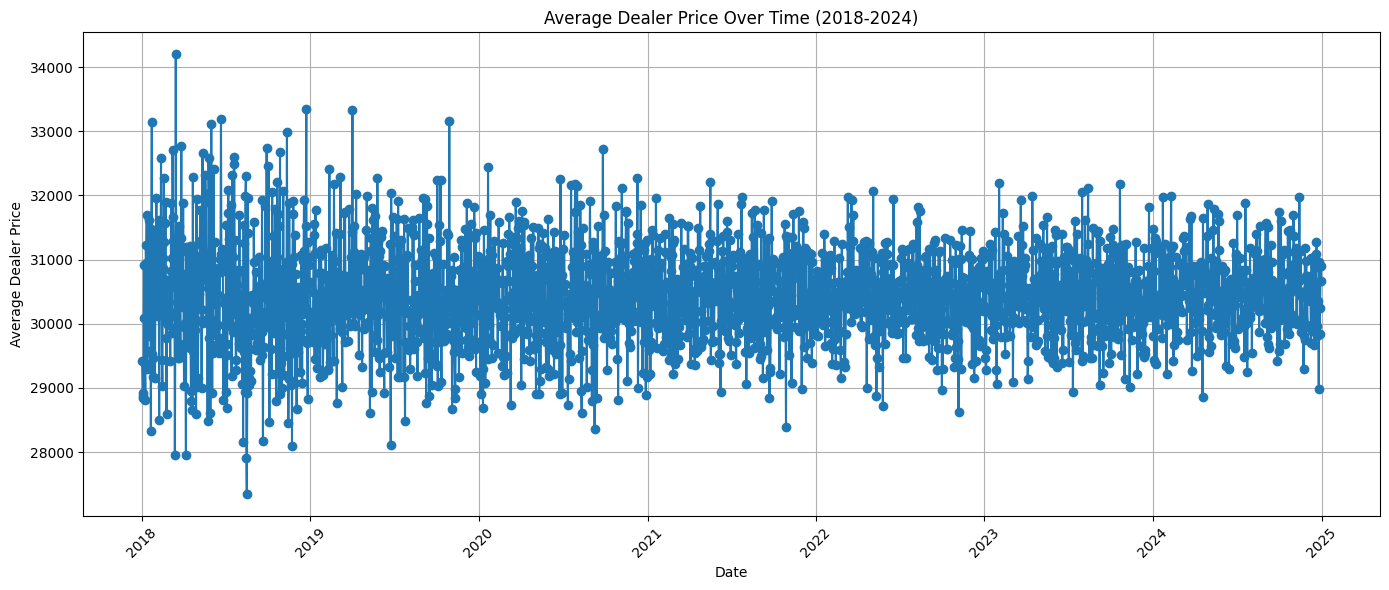

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Date' is a datetime column
car_sales_cleaned['Date'] = pd.to_datetime(car_sales_cleaned['Date'])

# Filter data between 2018 and 2024
mask = (car_sales_cleaned['Date'].dt.year >= 2018) & (car_sales_cleaned['Date'].dt.year <= 2024)
df_filtered = car_sales_cleaned.loc[mask]

# Group by Date and calculate average Dealer Price
avg_dealer_price_by_date = df_filtered.groupby('Date')['Dealer Car Price'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(14,6))
plt.plot(avg_dealer_price_by_date['Date'], avg_dealer_price_by_date['Dealer Car Price'], marker='o', linestyle='-')
plt.title('Average Dealer Price Over Time (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Average Dealer Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Save the cleaned dataset to CSV
car_sales_no_duplicates.to_csv('/content/car_sales_no_duplicates.csv', index=False)

# Download the CSV to your computer
from google.colab import files
files.download('/content/car_sales_no_duplicates.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>